<a href="https://colab.research.google.com/github/Alan-Cheong/IEEE_QW_2020/blob/master/Mercury_Orbit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

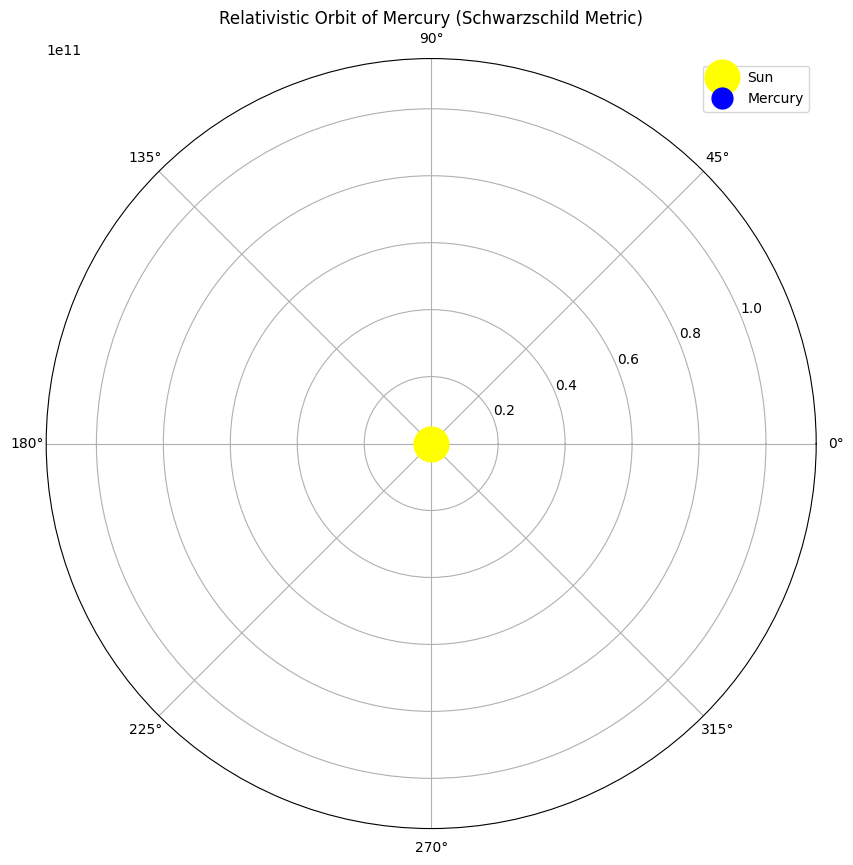

In [ ]:
!pip install matplotlib

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Constants for the simulation
G = 6.67430e-11         # Gravitational constant, m^3 kg^-1 s^-2
M = 1.989e30            # Mass of the Sun, kg
c = 299792458           # Speed of light, m/s
AU = 1.496e11           # Astronomical unit in meters
perihelion_distance = 4.6e10  # Perihelion of Mercury in meters

# Simulation parameters
num_points = 2000       # Number of points for orbit
theta_max = 12 * np.pi  # Total angle to cover (over many orbits)
dt = theta_max / num_points

# Constants derived for the Schwarzschild orbit
L = perihelion_distance * 5.79e10  # Effective angular momentum, exaggerated for illustration
alpha = (3 * G * M) / (c**2 * perihelion_distance)  # Schwarzschild precession term

# Arrays for theta and radial distance r
theta = np.linspace(0, theta_max, num_points)
r = np.zeros(num_points)

# Calculate radial distance with a simple approximation (not strictly Schwarzschild)
for i in range(num_points):
    r[i] = perihelion_distance * (1 + 0.205 * np.cos(theta[i]))  # Elliptical orbit approximation

# Setting up the plot
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': 'polar'})
ax.set_ylim(0, 2.5 * perihelion_distance)
ax.set_title("Relativistic Orbit of Mercury (Schwarzschild Metric)")

# Plot the Sun at the center with a yellow color
sun, = ax.plot(0, 0, 'o', color='yellow', markersize=25, label='Sun')

# Initialize the line and point for the orbit
line, = ax.plot([], [], lw=5.5, color='red')
mercury, = ax.plot([], [], 'o', color='blue', markersize=15, label='Mercury')  # Mercury's marker

# Initialization function to set up background
def init():
    line.set_data([], [])
    mercury.set_data([], [])
    return line, mercury

# Animation function to update each frame
def animate(i):
    # Update the orbit path line up to the current point
    line.set_data(theta[:i], r[:i])
    # Update Mercury's current position
    mercury.set_data(theta[i], r[i])
    return line, mercury

# Call the animator with init_func defined
ani = animation.FuncAnimation(fig, animate, frames=num_points, init_func=init, interval=10, blit=True)

# Display the animation
plt.legend(loc="upper right")
plt.show()





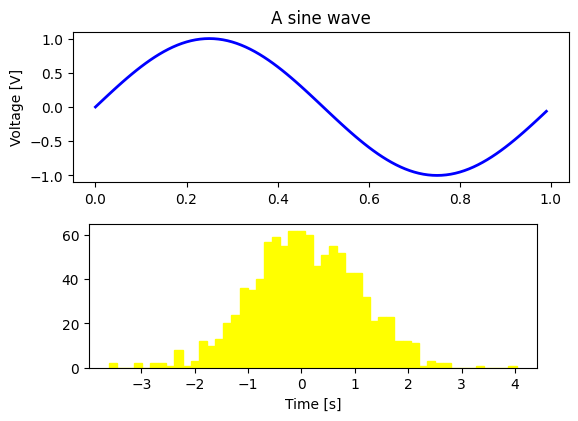

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
fig.subplots_adjust(top=0.8)
ax1 = fig.add_subplot(211)
ax1.set_ylabel('Voltage [V]')
ax1.set_title('A sine wave')

t = np.arange(0.0, 1.0, 0.01)
s = np.sin(2*np.pi*t)
line, = ax1.plot(t, s, color='blue', lw=2)

# Fixing random state for reproducibility
np.random.seed(19680801)

ax2 = fig.add_axes([0.15, 0.1, 0.7, 0.3])
n, bins, patches = ax2.hist(np.random.randn(1000), 50,
                            facecolor='yellow', edgecolor='yellow')
ax2.set_xlabel('Time [s]')

plt.show()

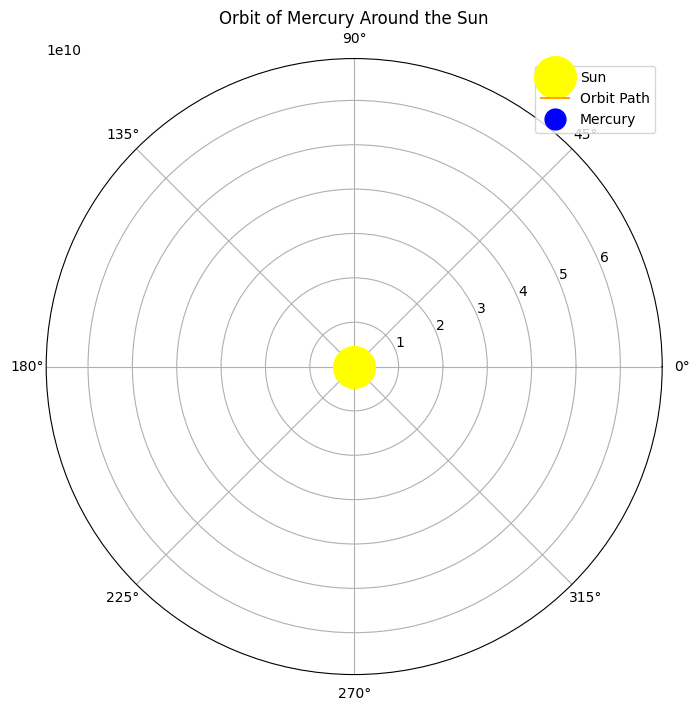

In [ ]:
!pip install matplotlib numpy

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib inline


# Constants for the simulation
AU = 1.496e11                # Astronomical unit in meters
perihelion_distance = 4.6e10 # Mercury's perihelion distance (closest to the Sun) in meters
eccentricity = 0.205         # Eccentricity of Mercury's orbit
semi_major_axis = perihelion_distance / (1 - eccentricity)  # Semi-major axis of orbit

# Simulation parameters
num_points = 1000  # Number of points for the orbit
theta = np.linspace(0, 2 * np.pi, num_points)  # Angular positions from 0 to 2π

# Calculate radial distance r for each angle theta in an elliptical orbit
r = semi_major_axis * (1 - eccentricity**2) / (1 + eccentricity * np.cos(theta))

# Setting up the plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': 'polar'})
ax.set_ylim(0, 1.2 * semi_major_axis)  # Set radial limit to 1.2 times the semi-major axis
ax.set_title("Orbit of Mercury Around the Sun")

# Plot the Sun at the center with a yellow color
sun, = ax.plot(0, 0, 'o', color='yellow', markersize=30, label='Sun')

# Initialize the line and point for the orbit
line, = ax.plot([], [], lw=1.5, color='orange', label="Orbit Path")
mercury, = ax.plot([], [], 'o', color='blue', markersize=15, label="Mercury")  # Mercury's current position

# Initialization function to set up the background of the animation
def init():
    line.set_data([], [])
    mercury.set_data([], [])
    return line, mercury

# Animation function to update the plot for each frame
def animate(i):
    # Update the orbit path up to the current frame
    line.set_data(theta[:i], r[:i])
    # Update Mercury's current position
    mercury.set_data(theta[i], r[i])
    return line, mercury

# Call the animator with the init function
ani = animation.FuncAnimation(fig, animate, frames=num_points, init_func=init, interval=100, blit=True)

plt.legend(loc="upper right")
plt.show()


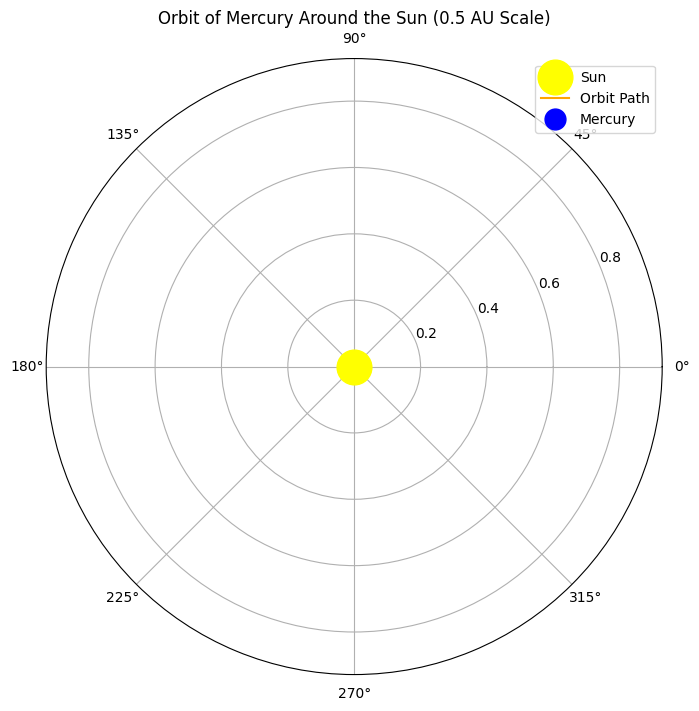

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Constants for the simulation
AU = 1.496e11                # Astronomical unit in meters
AU_0_5 = 0.5 * AU            # 0.5 AU in meters
perihelion_distance = 4.6e10 # Mercury's perihelion distance (closest to the Sun) in meters
eccentricity = 0.205         # Eccentricity of Mercury's orbit
semi_major_axis = perihelion_distance / (1 - eccentricity)  # Semi-major axis of orbit

# Simulation parameters
num_points = 1000  # Number of points for the orbit
theta = np.linspace(0, 2 * np.pi, num_points)  # Angular positions from 0 to 2π

# Calculate radial distance r for each angle theta in an elliptical orbit
r = semi_major_axis * (1 - eccentricity**2) / (1 + eccentricity * np.cos(theta))

# Setting up the plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': 'polar'})
ax.set_ylim(0, 1.2 * semi_major_axis / AU_0_5)  # Adjust limits for 0.5 AU scale
ax.set_title("Orbit of Mercury Around the Sun (0.5 AU Scale)")

# Plot the Sun at the center with a yellow color
sun, = ax.plot(0, 0, 'o', color='yellow', markersize=25, label='Sun')

# Initialize the line for the orbit and the point for Mercury's current position
line, = ax.plot([], [], lw=1.5, color='orange', label="Orbit Path")
mercury, = ax.plot([], [], 'o', color='blue', markersize=15, label="Mercury")  # Mercury's current position

# Initialization function to set up the background of the animation
def init():
    line.set_data([], [])
    mercury.set_data([], [])
    return line, mercury

# Animation function to update the plot for each frame
def animate(i):
    # Update the orbit path up to the current frame
    line.set_data(theta[:i], r[:i] / AU_0_5)  # Scale the radial distance to 0.5 AU
    # Update Mercury's current position
    mercury.set_data(theta[i], r[i] / AU_0_5)  # Scale the radial distance to 0.5 AU
    return line, mercury

# Call the animator with the init function
# Set interval to slow down the animation
ani = animation.FuncAnimation(fig, animate, frames=num_points, init_func=init, interval=100, blit=True)

# Show the plot
plt.legend(loc="upper right")
plt.show()


<ipython-input-22-1b9bf3574fc4>:41: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  r[i], phi[i], pr, pphi = calculate_orbit(r[i-1], phi[i-1], pr, pphi, dt)


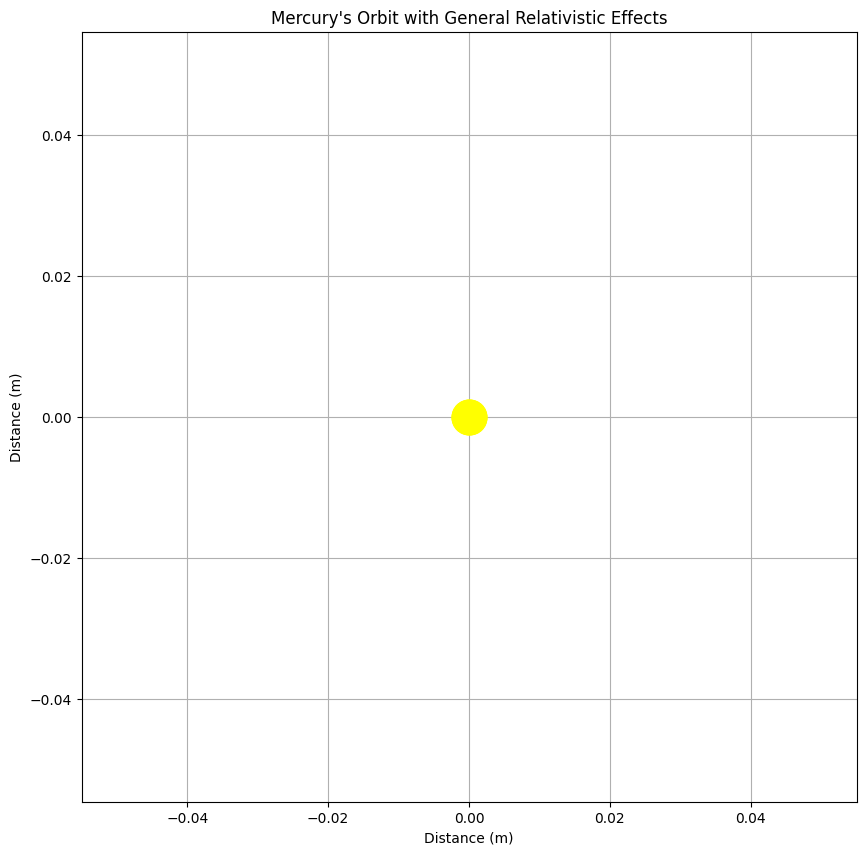

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Constants (in appropriate units)
G = 6.67430e-11
M = 1.989e30  # Mass of Sun
c = 299792458
dt = 100

# Mercury parameters
mercury_a = 5.79e10  # Semi-major axis
e = 0.206  # Eccentricity
initial_r = mercury_a * (1 + e)  # Initial radius

def calculate_orbit(r, phi, pr, pphi, dt):
    # Schwarzschild metric equations
    rs = 2 * G * M / (c * c)

    # Update positions and momenta
    r_new = r + pr * dt / r
    phi_new = phi + pphi * dt / (r * r)

    # Update momenta with relativistic corrections
    pr_new = pr + dt * (pphi * pphi / (r * r * r) - G * M / (r * r) * (1 + 3 * pphi * pphi / (r * r * c * c)))
    pphi_new = pphi  # Angular momentum is conserved

    return r_new, phi_new, pr_new, pphi_new

# Initialize arrays
steps = 1000
r = np.zeros(steps)
phi = np.zeros(steps)
r[0] = initial_r
phi[0] = 0
pr = np.array([0.0])  # Initial radial momentum
pphi = np.array([np.sqrt(G * M * initial_r)])  # Initial angular momentum

# Calculate orbit
for i in range(1, steps):
    r[i], phi[i], pr, pphi = calculate_orbit(r[i-1], phi[i-1], pr, pphi, dt)

# Create animation
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_xlim(-1.5e11, 1.5e11)
ax.set_ylim(-1.5e11, 1.5e11)

# Plot Sun
sun, = ax.plot(0, 0, 'o', color='yellow', markersize=25, label='Sun')
#sun = plt.Circle(0, 0, 6.957e8, color='yellow', markersize=25, label="sun")
ax.add_artist(sun)

# Mercury orbit
line, = ax.plot([], [], 'b-', lw=1)
mercury, = ax.plot([], [], 'o', color='blue', markersize=15, label="Mercury")  # Mercury's current position
#mercury, = ax.plot([], [], 'ko', markersize=10)

def init():
    line.set_data([], [])
    mercury.set_data([], [])
    return line, mercury

def animate(i):
    x = r[:i] * np.cos(phi[:i])
    y = r[:i] * np.sin(phi[:i])
    line.set_data(x, y)
    mercury.set_data(x[i-1], y[i-1])
    return line, mercury

ani = animation.FuncAnimation(fig, animate, init_func=init, frames=steps,
                            interval=20, blit=True)

plt.title("Mercury's Orbit with General Relativistic Effects")
plt.xlabel("Distance (m)")
plt.ylabel("Distance (m)")
plt.axis('equal')
plt.grid(True)
plt.show()



<ipython-input-24-681876c27de8>:41: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  r[i], phi[i], pr, pphi = calculate_orbit(r[i-1], phi[i-1], pr, pphi, dt)


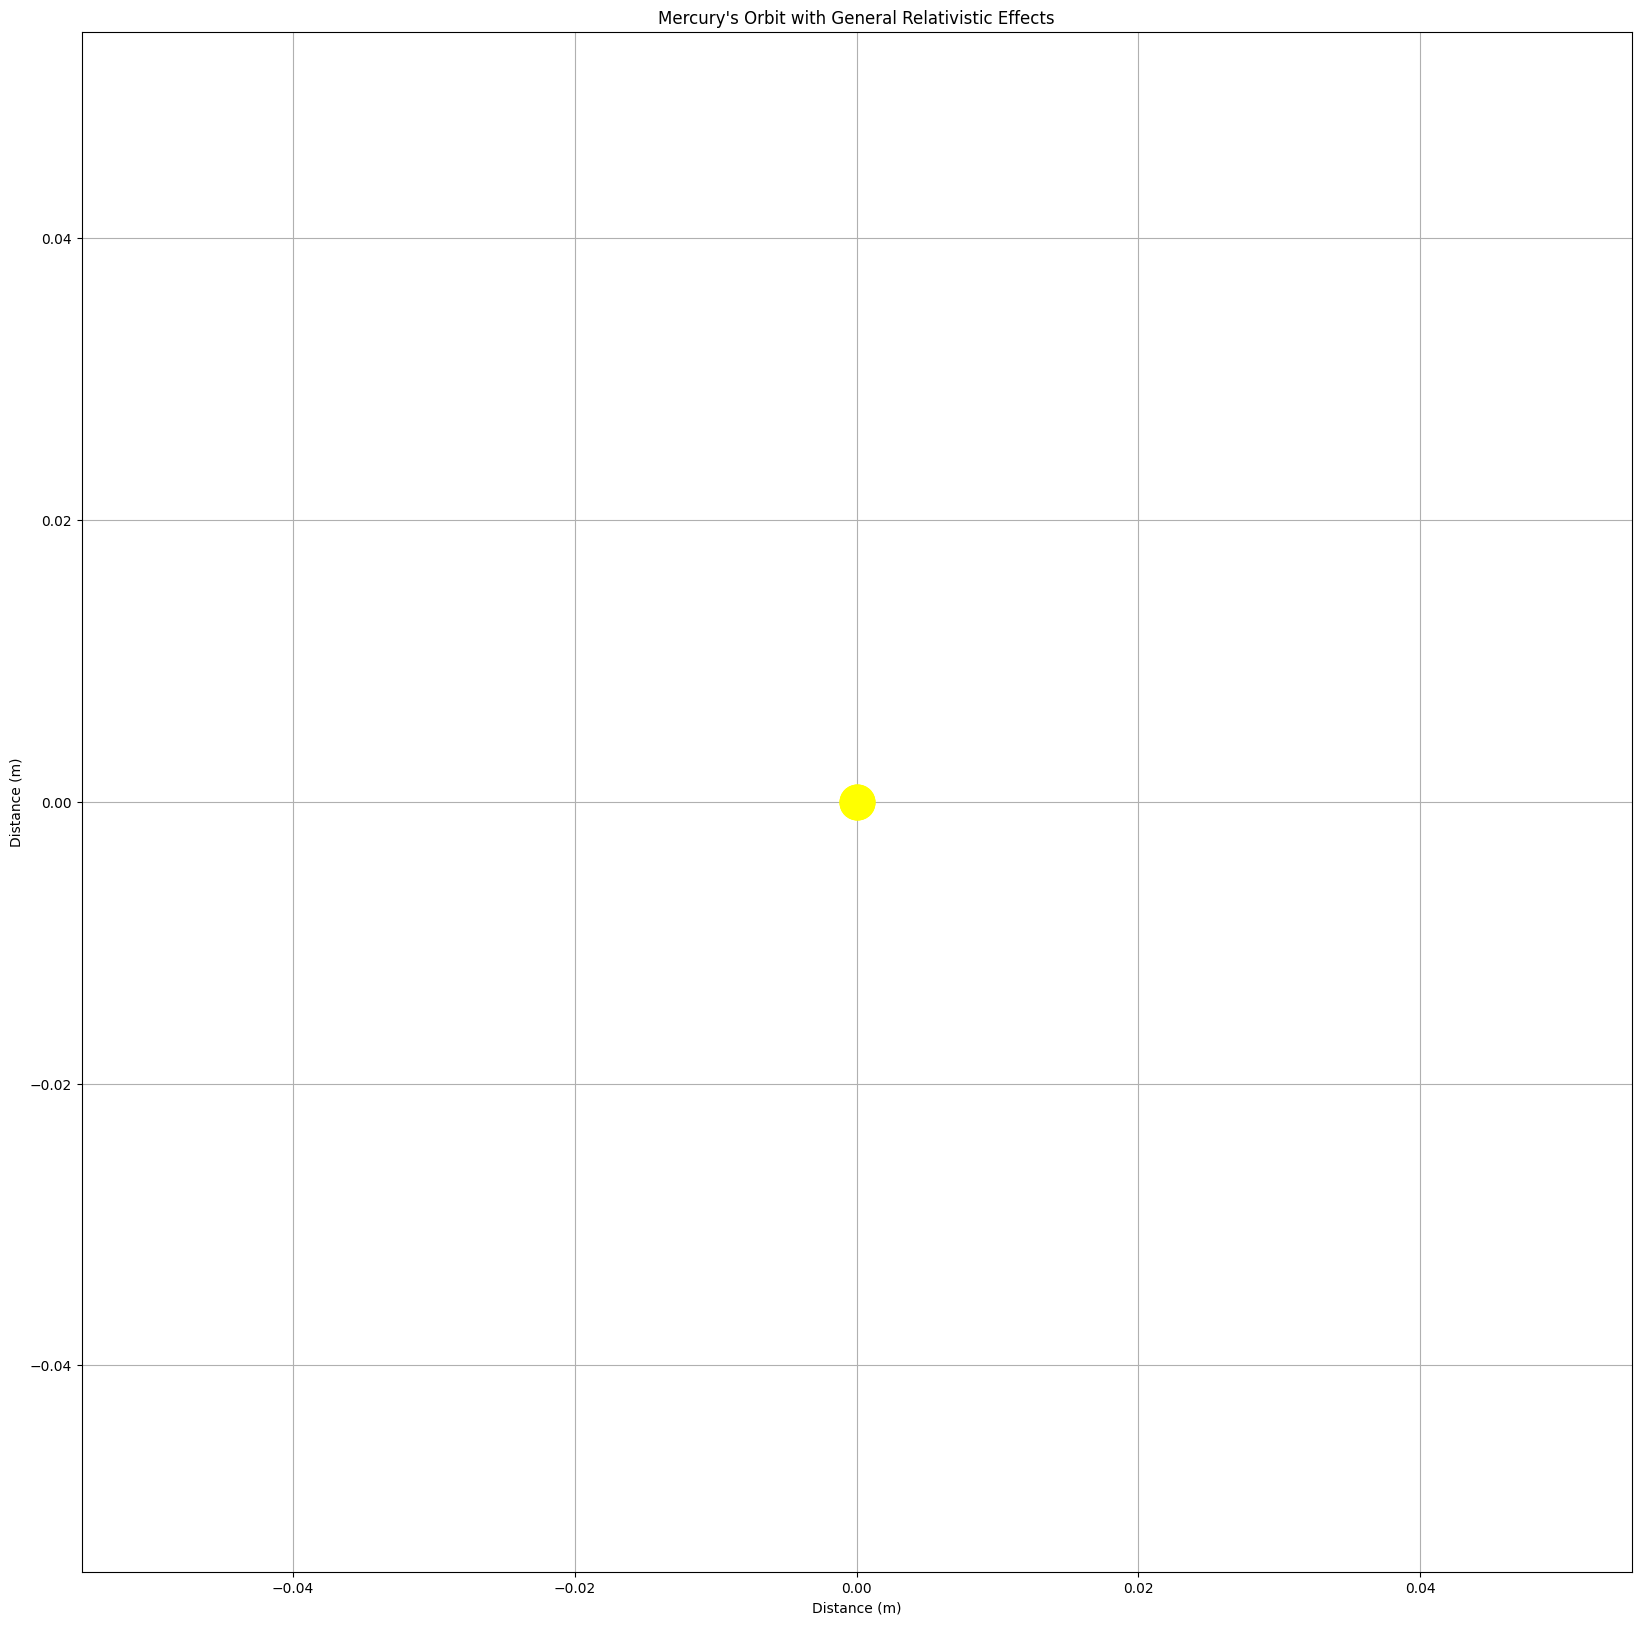

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Constants (in appropriate units)
G = 6.67430e-11
M = 1.989e30  # Mass of Sun
c = 299792458
dt = 100  # Time step

# Mercury parameters
mercury_a = 5.79e10  # Semi-major axis
e = 0.206  # Eccentricity
initial_r = mercury_a * (1 + e)  # Initial radius

def calculate_orbit(r, phi, pr, pphi, dt):
    # Schwarzschild metric equations
    rs = 2 * G * M / (c * c)

    # Update positions and momenta
    r_new = r + pr * dt / r
    phi_new = phi + pphi * dt / (r * r)

    # Update momenta with relativistic corrections
    pr_new = pr + dt * (pphi * pphi / (r * r * r) - G * M / (r * r) * (1 + 3 * pphi * pphi / (r * r * c * c)))
    pphi_new = pphi  # Angular momentum is conserved

    return r_new, phi_new, pr_new, pphi_new

# Initialize arrays
steps = 1000
r = np.zeros(steps)
phi = np.zeros(steps)
r[0] = initial_r
phi[0] = 0
pr = np.array([0.0])  # Initial radial momentum
pphi = np.array([np.sqrt(G * M * initial_r)])  # Initial angular momentum

# Calculate orbit
for i in range(1, steps):
    r[i], phi[i], pr, pphi = calculate_orbit(r[i-1], phi[i-1], pr, pphi, dt)

# Create animation
fig, ax = plt.subplots(figsize=(20, 20))
ax.set_xlim(-10e11, 10e11)
ax.set_ylim(-10e11, 10e11)

# Plot Sun
sun, = ax.plot(0, 0, 'o', color='yellow', markersize=25, label='Sun')
#sun = plt.Circle((0, 0), 6.957e8, color='yellow')
ax.add_artist(sun)

# Mercury orbit
line, = ax.plot([], [], 'b-', lw=1)
mercury, = ax.plot([], [], 'o', color='blue', markersize=15, label="Mercury")  # Mercury's current position
#mercury, = ax.plot([], [], 'ko', markersize=15)

def init():
    line.set_data([], [])  # Empty lists for x and y data
    mercury.set_data([], [])
    return line, mercury


def animate(i):
    x = r[:i] * np.cos(phi[:i])
    y = r[:i] * np.sin(phi[:i])
    line.set_data(x, y) # Make sure to update with x, y
    mercury.set_data(x[i-1], y[i-1])
    return line, mercury

ani = animation.FuncAnimation(fig, animate, init_func=init, frames=steps,
                            interval=20, blit=False)

plt.title("Mercury's Orbit with General Relativistic Effects")
plt.xlabel("Distance (m)")
plt.ylabel("Distance (m)")
plt.axis('equal')
plt.grid(True)
plt.show()